In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
customers = pd.read_csv('Datasets/Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [7]:
customers.shape

(2000, 8)

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [9]:
customers.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income ($)         False
Spending Score (1-100)    False
Profession                 True
Work Experience           False
Family Size               False
dtype: bool

In [12]:
customers = customers.dropna(axis='rows')

### Even age distribution


(array([374., 446., 390., 368., 387.]),
 array([  0.,  20.,  40.,  60.,  80., 100.]),
 <BarContainer object of 5 artists>)

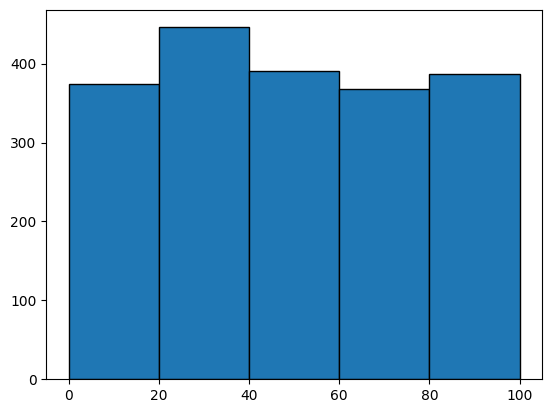

In [50]:
plt.hist(x=customers['Age'], bins=[0, 20, 40, 60, 80, 100], edgecolor="k")

In [54]:
customers['Gender'] = customers['Gender'].str.replace('Male', 'M')
customers['Gender'] = customers['Gender'].str.replace('Female', 'F')

customers['Gender'].head()

0    M
1    M
2    F
3    F
4    F
Name: Gender, dtype: object

### Gender distribution

([<matplotlib.patches.Wedge at 0x7f6b1c1d1c00>,
 [Text(-0.318103273495275, 1.0530006207935445, ''),
  Text(0.31810317490624024, -1.053000650576518, '')])

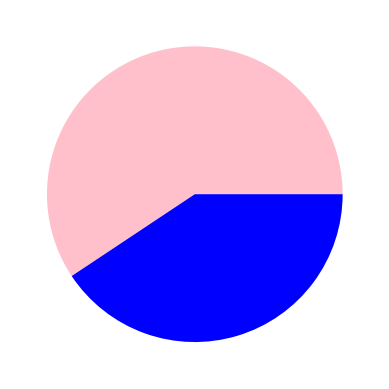

In [75]:
(female, male) = customers['Gender'].value_counts()

plt.pie([female, male], colors=['pink', 'blue'])

### The majority of customers is represented by females, as they have a majority of around 60%

The difference between genders is not considerable, thus marketing should not be targeted towards females only.

### Distribution of jobs

([<matplotlib.patches.Wedge at 0x7f6b1bf22590>,
 [Text(0.6141398223975006, 0.9125964489003705, 'Healthcare'),
  Text(-0.8805235522307555, 0.6593013529236325, 'Engineer'),
  Text(-1.059147076884576, -0.2969974234347125, 'Lawyer'),
  Text(-0.6543638725165953, -0.8841990286949455, 'Entertainment'),
  Text(-0.10273110955153761, -1.095192366267365, 'Artist'),
  Text(0.43694350057407394, -1.0094951100951775, 'Executive'),
  Text(0.847900868551892, -0.7007596714344708, 'Doctor'),
  Text(1.041446409089316, -0.3541036246566381, 'Homemaker'),
  Text(1.0949428550775926, -0.1053572214636018, 'Marketing')])

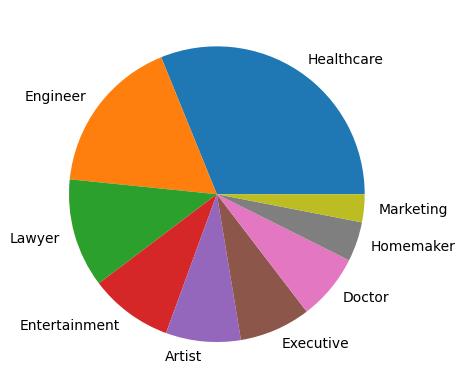

In [85]:
professions = customers['Profession'].value_counts()
labels = customers['Profession'].unique()

plt.pie(professions, labels=labels)

In [86]:
customers.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,M,19,15000,39,Healthcare,1,4
1,2,M,21,35000,81,Engineer,3,3
2,3,F,20,86000,6,Engineer,1,1
3,4,F,23,59000,77,Lawyer,0,2
4,5,F,31,38000,40,Entertainment,2,6


In [94]:
((professions[0] + professions[1] + professions[2]) / professions.sum() * 100).round(2)

60.31

### 60.31% of customers work in the following fields:
Healthcare 

Engineering 

Law 


Thus, the marketing should be targeted towards these people

<BarContainer object of 9 artists>

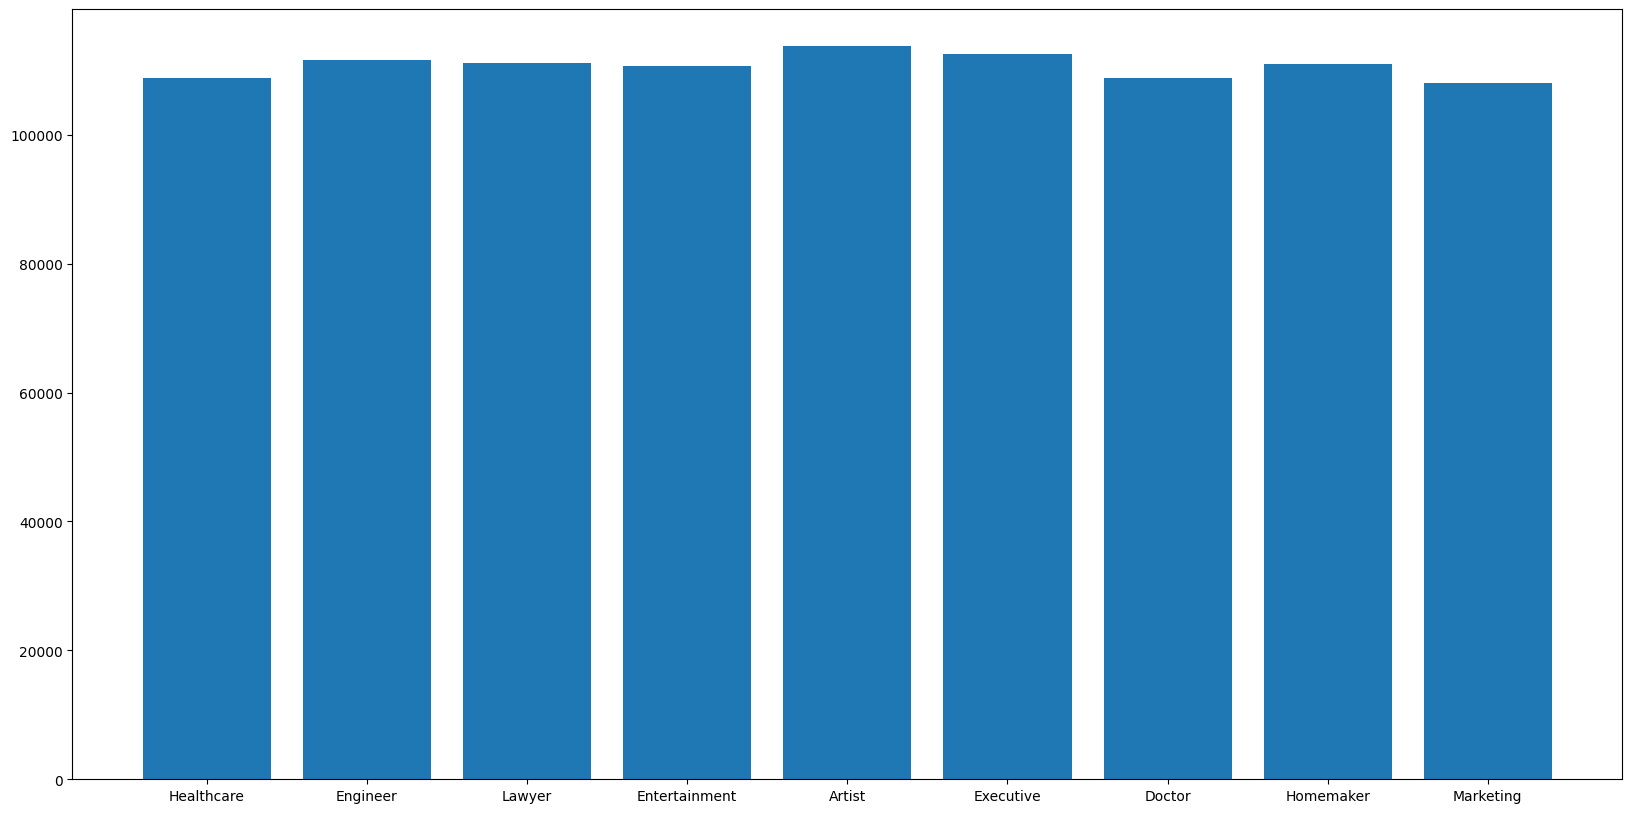

In [130]:
mean_salary = customers.groupby(customers['Profession'])['Annual Income ($)'].mean().round(2)

plt.figure(figsize=(20, 10))
plt.bar(labels, mean_salary)

We can observe that the median salary of all customers is above 100k/year (no matter the profession), thus the target audience is in the top 18% of americans.

In [140]:
customers.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,M,19,15000,39,Healthcare,1,4
1,2,M,21,35000,81,Engineer,3,3
2,3,F,20,86000,6,Engineer,1,1
3,4,F,23,59000,77,Lawyer,0,2
4,5,F,31,38000,40,Entertainment,2,6


In [168]:
spending_score = customers.groupby(pd.cut(customers['Annual Income ($)'], bins=[0, 10000, 30000, 50000, 70000, 90000, 100000, 120000, 150000, 200000]))['Spending Score (1-100)'].mean().round(2)

spending_score

Annual Income ($)
(0, 10000]          53.58
(10000, 30000]      45.33
(30000, 50000]      52.41
(50000, 70000]      49.42
(70000, 90000]      47.98
(90000, 100000]     53.12
(100000, 120000]    51.84
(120000, 150000]    54.15
(150000, 200000]    50.70
Name: Spending Score (1-100), dtype: float64

### Conclusion

As you can notice, the customers are distributed evenly, no matter the criteria, but the average salary is in the top ~15% in the United States. Thus, the ads should pe targeted towards financially stable people with a solid monthly income, who are usually attracted by higher quality products but who also don't skip having second toughts about prices.